# Data Science Project Lifecycle - A Case Study
## Step 1: Busines Understanding
#### Problem Statement: Prediction of Yahoo Stock Market
#### Data Set: Yahoo Stock Price

### Step 2: Data Exploration

#### Import Libraries

In [141]:
import pandas as pd 
from datetime import datetime
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


#### Read Dataset

In [142]:
SPY_data = pd.read_csv("E:\DS-Case_Study\Case_Study\Data\SPY_2015.csv")
 
SPY_data

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\HP\AppData\Local\Temp\ipykernel_15100\1071071205.py:1: SyntaxWarning: invalid escape sequence '\D'
  SPY_data = pd.read_csv("E:\DS-Case_Study\Case_Study\Data\SPY_2015.csv")


,Date,Open,High,Low,Close,Adj Close,Volume
0,12/7/2015,2090.419922,2090.419922,2066.780029,2077.070068,2077.070068,4043820000
1,12/4/2015,2051.239990,2093.840088,2051.239990,2091.689941,2091.689941,4214910000
2,12/3/2015,2080.709961,2085.000000,2042.349976,2049.620117,2049.620117,4306490000
3,12/2/2015,2101.709961,2104.270020,2077.110107,2079.510010,2079.510010,3950640000
4,12/1/2015,2082.929932,2103.370117,2082.929932,2102.629883,2102.629883,3712120000
...,...,...,...,...,...,...,...
1488,1/8/2010,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
1489,1/7/2010,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
1490,1/6/2010,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
1491,1/5/2010,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000


In [143]:
# Change the Date column from object to datetime object 
SPY_data["Date"] = pd.to_datetime(SPY_data["Date"])
 
# Preview the data
SPY_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,2077.070068,4043820000
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,2091.689941,4214910000
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,2049.620117,4306490000
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,2079.510010,3950640000
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,2102.629883,3712120000
5,2015-11-30,2090.949951,2093.810059,2080.409912,2080.409912,2080.409912,4245030000
6,2015-11-27,2088.820068,2093.290039,2084.129883,2090.110107,2090.110107,1466840000
7,2015-11-25,2089.300049,2093.000000,2086.300049,2088.870117,2088.870117,2852940000
8,2015-11-24,2084.419922,2094.120117,2070.290039,2089.139893,2089.139893,3884930000
9,2015-11-23,2089.409912,2095.610107,2081.389893,2086.590088,2086.590088,3587980000


## Step 3: Data Cleansing and Transformation


##### Indexing and Sorting

In [144]:
# Set Date as index
SPY_data.set_index('Date',inplace=True)
 
# Reverse the order of the dataframe in order to have oldest values at top
SPY_data.sort_values('Date',ascending=True)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,2102.629883,3712120000
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,2079.510010,3950640000
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,2049.620117,4306490000


##### Check Null Values

In [145]:
# Take the name of the columns of the SPY_data to see if null values exists
variables = SPY_data.columns 
SPY_data.isnull().sum().loc[variables]

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Step 4: Exploratory Data Analysis

In [146]:
jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))

def correlation (df,variables,n_rows,n_cols):
    fig = plt.figure(figsize=(8,6))
    #fig = plt.figure(figsize=(14,9))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df['Adj Close'],asset, c=next(colors))
        ax.set_xlabel("Adj Close")
        ax.set_ylabel("{}".format(var))
        ax.set_title(var + " vs price")
    fig.tight_layout()
    plt.show()    

#### Correlation

##### Is there any correlation between Volume and Adj Close price?

C:\Users\HP\AppData\Local\Temp\ipykernel_15100\235777585.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df['Adj Close'],asset, c=next(colors))


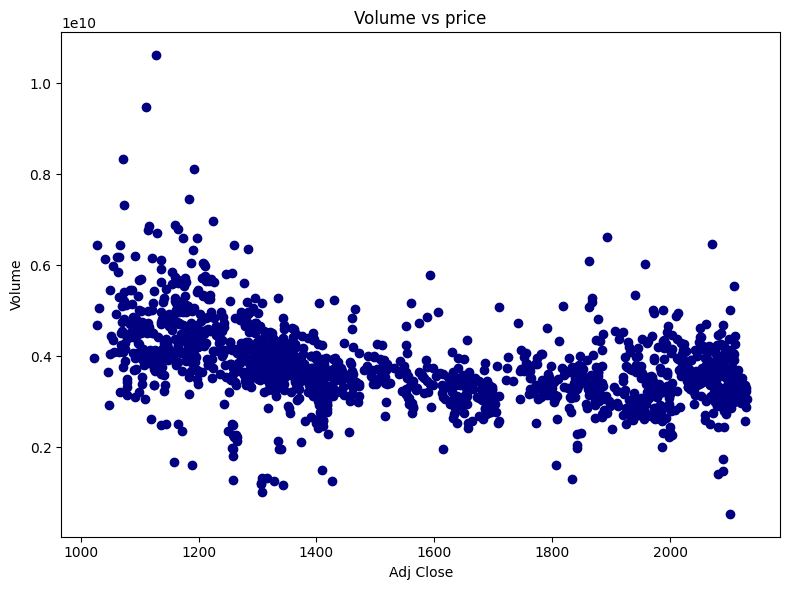

In [147]:
# Is there any correlation between Volume and Adj Close price?
variables = SPY_data.columns[-1:]   # read last column name
correlation(SPY_data,variables,1,1)

##### Is there any correlation between Adj Close price vs. Open, High, Low, Close ?

C:\Users\HP\AppData\Local\Temp\ipykernel_15100\235777585.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df['Adj Close'],asset, c=next(colors))


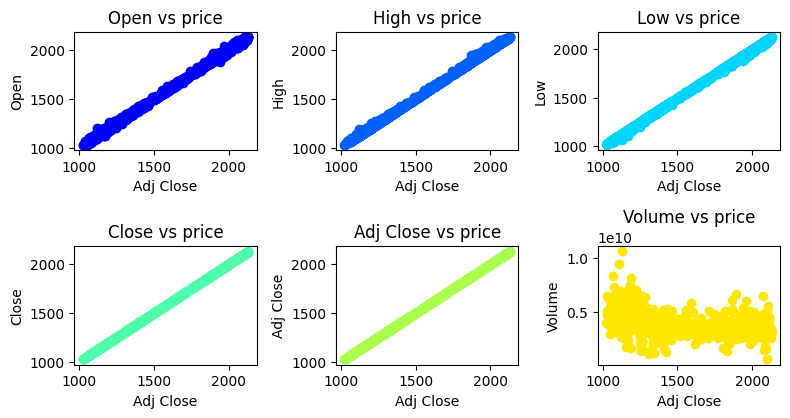

In [148]:
#Is there any correlation between Adj Close price vs. Open, High, Low, Close ?
variables = SPY_data.columns#[0:6]
correlation(SPY_data,variables,3,3)

In [149]:
SPY_data.corr()['Adj Close'].loc[variables]

Open         0.999187
High         0.999637
Low          0.999702
Close        1.000000
Adj Close    1.000000
Volume      -0.408814
Name: Adj Close, dtype: float64

## Step 5: Feature Engineering

In [150]:
SPY_data["High-Low_pct"] = (SPY_data['High'] - SPY_data['Low']).pct_change()
SPY_data['ewm_5'] = SPY_data['Close'].ewm(span=5).mean().shift(periods=1)
SPY_data['price_std_5'] = SPY_data["Close"].rolling(center=False,window=30).std().shift(periods = 1)

SPY_data["Volume_change"] = SPY_data["Volume"].pct_change()
SPY_data['volume_avg_5'] = SPY_data['Close'].rolling(center=False , window=5).mean().shift(periods=1)
SPY_data['volume_Close'] = SPY_data['Volume'].rolling(center=False , window=5).std().shift(periods=1)

##### Correlation with New features

C:\Users\HP\AppData\Local\Temp\ipykernel_15100\235777585.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df['Adj Close'],asset, c=next(colors))


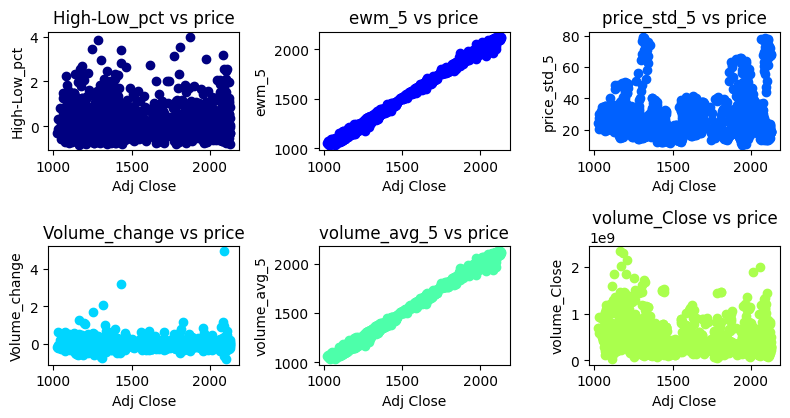

In [151]:
jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))

# Take the name of the last 6 columns of the SPY_data which are the model features

variables = SPY_data.columns[-6:]
correlation(SPY_data,variables,3,3)

In [152]:
SPY_data.corr()['Adj Close'].loc[variables]

High-Low_pct    -0.010328
ewm_5            0.998513
price_std_5      0.100524
Volume_change   -0.005446
volume_avg_5     0.998116
volume_Close    -0.241898
Name: Adj Close, dtype: float64

## Step 6: Build Predictive Model

##### 
Check Null values

In [153]:
SPY_data.head(5)

,Open,High,Low,Close,Adj Close,Volume,High-Low_pct,ewm_5,price_std_5,Volume_change,volume_avg_5,volume_Close
Date,,,,,,,,,,,,
2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,2077.070068,4043820000,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,2091.689941,4214910000,0.802043,2077.070068,NaN,0.042309,NaN,NaN
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,2049.620117,4306490000,0.001172,2085.841992,NaN,0.021728,NaN,NaN
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,2079.510010,3950640000,-0.363191,2068.684262,NaN,-0.082631,NaN,NaN
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,2102.629883,3712120000,-0.247413,2073.181111,NaN,-0.060375,NaN,NaN


In [154]:
SPY_data.isnull().sum().loc[variables]

High-Low_pct      1
ewm_5             1
price_std_5      30
Volume_change     1
volume_avg_5      5
volume_Close      5
dtype: int64

##### Drop/Remove NA records

In [155]:
## To train a model, it is necessary to drop missing values.

SPY_data = SPY_data.dropna(axis = 0)

##### Train & Test Dataset Distribution

In [156]:
# Generate the train and test sets

train = SPY_data[SPY_data.index < datetime(year=2015, month=1, day=1)]

test = SPY_data[SPY_data.index >= datetime(year=2015, month=1, day=1)]

dates = test.index

##### Building Regression Model

In [157]:
lr = LinearRegression()
X_train = train [["High-Low_pct","ewm_5","price_std_5","volume_avg_5","Volume_change","volume_Close"]]
 
Y_train = train["Adj Close"]
 
lr.fit(X_train,Y_train)   

LinearRegression()

LinearRegression()

##### Test Dataset

In [158]:
# Create the test features dataset (X_test) which will be used to make the predictions.
X_test = test[["High-Low_pct","ewm_5","price_std_5","volume_avg_5","Volume_change","volume_Close"]].values 

# The labels of the model
Y_test = test["Adj Close"].values # will be used for comparison

##### Prediction

In [159]:
close_predictions = lr.predict(X_test)  

c:\Users\HP\anaconda3\envs\python12\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Model Evaluation
Mean Absolute Error (MAE):
In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. MAE is calculated as:

mae_eq.PNG

The mean absolute error is a common measure of forecast error in time series analysis.

In [160]:
mae = sum(abs(close_predictions - test["Adj Close"].values)) / test.shape[0]
print(mae)

16.715188727582483


#### Error Graph for last 25 days

C:\Users\HP\AppData\Local\Temp\ipykernel_15100\1610410931.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')


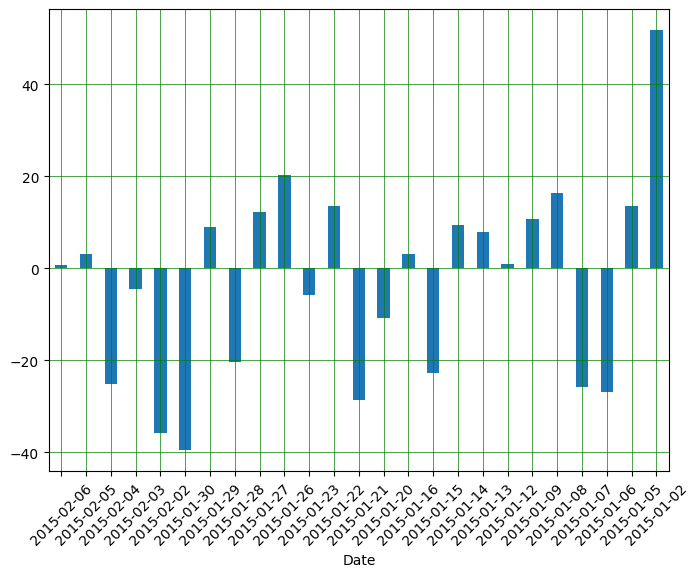

In [161]:
# Create a dataframe that output the Date, the Actual and the predicted values
df = pd.DataFrame({'Date':dates,'Actual': Y_test, 'Predicted': close_predictions})
df1 = df.tail(25)
 
# set the date with string format for plotting
df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')
 
df1.set_index('Date',inplace=True)
 
error = df1['Actual'] - df1['Predicted']
 
# Plot the error term between the actual and predicted values for the last 25 days
 
error.plot(kind='bar',figsize=(8,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
plt.show()